In [ ]:
📝 Project Title: Household Expenditure and Income Patterns – Classified by Region and Income Category

Introduction: This project is about understanding how people in different parts of a country spend money and how much income they have. The data includes details like:
Where people live (regions or provinces)
. How much they earn (income groups)
. How much they spend (expenses like food, housing, etc.)
. The year of the data
. By studying this data, we can find patterns such as:
. Which regions spend more or less
. How income levels affect spending habits
. What types of expenses are most common
. How things change over time 

We cleaned the data by fixing missing values and converting categories into numbers. Then, we analyzed the data using charts and graphs to make it easier to understand.
This kind of study helps the government, researchers, and businesses make better decisions—like where to offer help, how to manage budgets, and which areas need more support.


 .The First step is to import the important libraries.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

# second step to load dataset
file_path = "C:\\Users\\kamal\\Downloads\\archive (3)\\Income_expense_data.csv"
A = pd.read_csv(file_path) 


# to print first 5 rows
print("First 5 rows:\n", A.head())
print("\nMissing values per column:\n", A.isnull().sum())

# 3. Handling missing values (fill numerical with median, categorical with mode)
B = A.select_dtypes(include=np.number).fillna(A.median(numeric_only=True))
C = A.select_dtypes(exclude=np.number).fillna(A.select_dtypes(exclude=np.number).mode().iloc[0])
A = pd.concat([B, C], axis=1)

# 4. Encoding categorical data (if any)
X = pd.get_dummies(A, drop_first=True)

# 5. Feature scaling (normalizing numerical data)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = X.select_dtypes(include=np.number).columns
X[num_cols] = scaler.fit_transform(X[num_cols])

# 6. Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# 7. Pairplot for visualization (sample only if dataset is large)
Y = X.sample(n=100) if len(X) > 100 else X
sns.pairplot(Y)
plt.show()

# 8. Distribution of a sample column (replace 'ColumnName' with real one)
Z = X.columns[0]
sns.histplot(X[Z], kde=True)
plt.title(f'Distribution of {Z}')
plt.show()
plt.figure(figsize=(10,5))
sns.barplot(data=A, x='Income Group', y='Expense', estimator=np.mean, palette='Set2')
plt.title("Average Expense by Income Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


First 5 rows:
    REF_DATE         GEO                          Statistic  \
0      2010  Province 1  Average expenditure per household   
1      2010  Province 1  Average expenditure per household   
2      2010  Province 1  Average expenditure per household   
3      2010  Province 1  Average expenditure per household   
4      2010  Province 1  Average expenditure per household   

  Before-tax household income quintile  \
0                        All quintiles   
1                        All quintiles   
2                        All quintiles   
3                        All quintiles   
4                        All quintiles   

  Household expenditures, summary-level categories      UOM COORDINATE  \
0                                Total expenditure  Dollars         C1   
1                       Food purchased from stores  Dollars         C2   
2                  Food purchased from restaurants  Dollars         C3   
3                                          Shelter  Dollars    

NumPy Operations on Dataset
1.Mean, median, std deviation, variance

2. Min, max, sum

3. Percentiles

4. Element-wise operations

5. Correlation matrix

6. Reshape (if needed)

7. Broadcasting examples

In [1]:
import pandas as pd
import numpy as np

# Load dataset
file_path = "C:\\Users\\kamal\\Downloads\\archive (3)\\Income_expense_data.csv"
df = pd.read_csv(file_path)

# Handle missing values
df['Expense'] = df['Expense'].fillna(df['Expense'].median())
df['Income'] = df['Income'].fillna(df['Income'].median())

# Convert Income and Expense to NumPy arrays
income = df['Income'].to_numpy()
expense = df['Expense'].to_numpy()

print("✅ NumPy Operations on 'Income' and 'Expense'\n")

# 📌 Basic Statistics
print("Mean Income:", np.mean(income))
print("Mean Expense:", np.mean(expense))
print("Median Income:", np.median(income))
print("Median Expense:", np.median(expense))
print("Standard Deviation Income:", np.std(income))
print("Standard Deviation Expense:", np.std(expense))
print("Variance Income:", np.var(income))
print("Variance Expense:", np.var(expense))
print("Min Income:", np.min(income))
print("Max Income:", np.max(income))
print("Sum Income:", np.sum(income))
print("25th Percentile Income:", np.percentile(income, 25))
print("75th Percentile Income:", np.percentile(income, 75))

# 📌 Element-wise addition/subtraction
difference = income - expense
print("\nFirst 5 Income - Expense Differences:", difference[:5])

# 📌 Logical operations
high_expense = expense > np.mean(expense)
print("\nNumber of records with high expense (above average):", np.sum(high_expense))

# 📌 Correlation
correlation_matrix = np.corrcoef(income, expense)
print("\nCorrelation Matrix:\n", correlation_matrix)

# 📌 Reshaping (for matrix operations)
income_reshaped = income.reshape(-1, 1)
expense_reshaped = expense.reshape(-1, 1)
print("\nReshaped Income shape:", income_reshaped.shape)

# 📌 Broadcasting Example
added_constant = income + 5000
print("\nIncome after adding 5000 (broadcast): First 5 ->", added_constant[:5])

# 📌 Dot Product (if makes sense)
dot_product = np.dot(income[:100], expense[:100])  # limited for readability
print("\nDot Product of first 100 values:", dot_product)

# 📌 Normalize income and expense
income_norm = (income - np.mean(income)) / np.std(income)
expense_norm = (expense - np.mean(expense)) / np.std(expense)
print("\nNormalized Income (first 5):", income_norm[:5])


✅ NumPy Operations on 'Income' and 'Expense'

Mean Income: 189943.96153846153
Mean Expense: 9513.72730015083
Median Income: 15470.0
Median Expense: 3195.5
Standard Deviation Income: 788777.4523102775
Standard Deviation Expense: 20868.36332033013
Variance Income: 622169869273.092
Variance Expense: 435488587.6692999
Min Income: 20.0
Max Income: 8980830.0
Sum Income: 2518656930.0
25th Percentile Income: 4740.0
75th Percentile Income: 43292.5

First 5 Income - Expense Differences: [7917305.  183991. 7797529. 7680950. 7538464.]

Number of records with high expense (above average): 2971

Correlation Matrix:
 [[1.         0.03734934]
 [0.03734934 1.        ]]

Reshaped Income shape: (13260, 1)

Income after adding 5000 (broadcast): First 5 -> [7994380.  194700. 7804670. 7700970. 7557050.]

Dot Product of first 100 values: 1885963455170.0

Normalized Income (first 5): [ 9.88800582e+00 -3.09290710e-04  9.64749438e+00  9.51602511e+00
  9.33356553e+00]


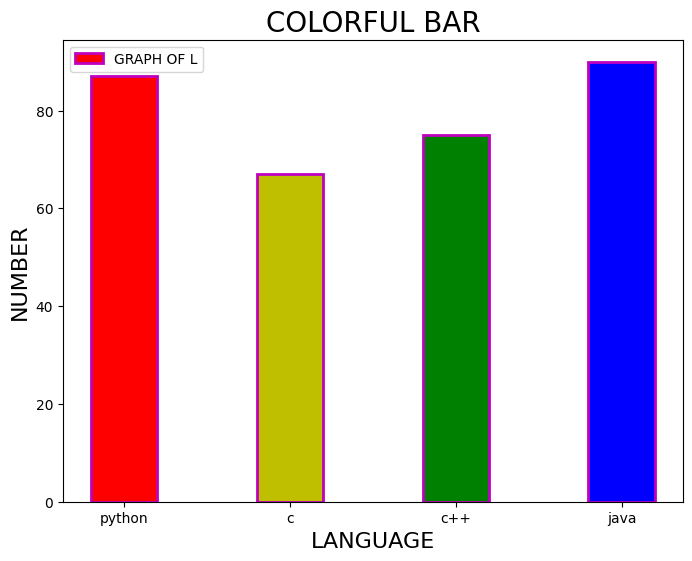

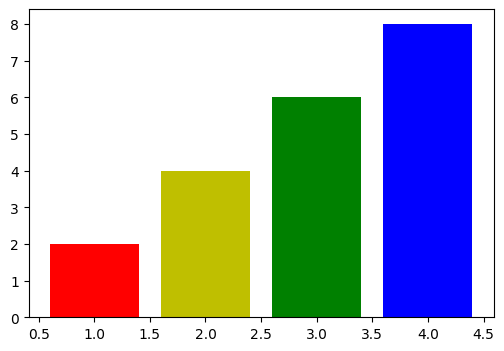

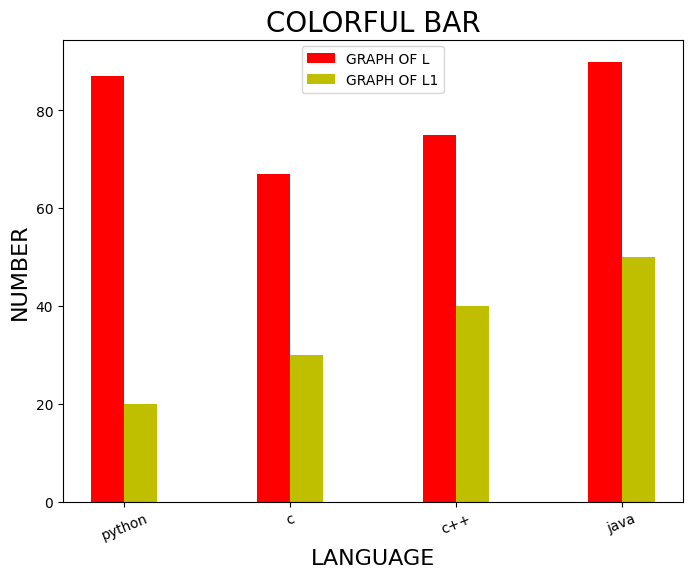

<Figure size 800x600 with 0 Axes>

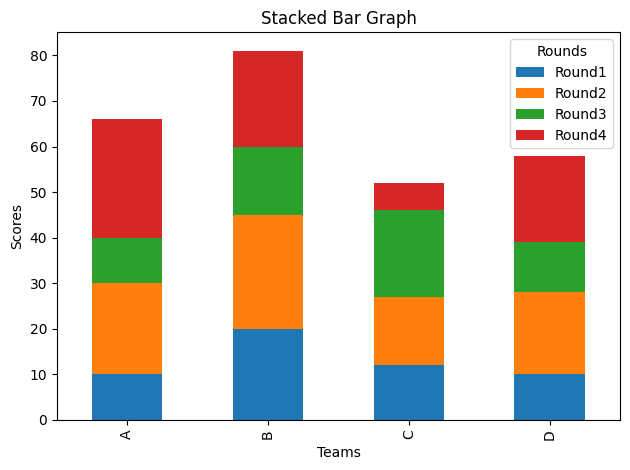

In [10]:
# Importing required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# -----------------------------
# BASIC BAR PLOT
x = ["python", "c", "c++", "java"]
y = [87, 67, 75, 90]
colors = ["r", "y", "g", "b"]

plt.figure(figsize=(8, 6))
plt.xlabel("LANGUAGE", fontsize=16)
plt.ylabel("NUMBER", fontsize=16)
plt.title("COLORFUL BAR", fontsize=20)
plt.bar(x, y, color=colors, width=0.4, align="center", edgecolor="m", linewidth=2, label="GRAPH OF L")
plt.legend()
plt.show()

# -----------------------------
# ANOTHER SIMPLE BAR PLOT
x = [1, 2, 3, 4]
y = [2, 4, 6, 8]
colors = ["r", "y", "g", "b"]

plt.figure(figsize=(6, 4))
plt.bar(x, y, color=colors)
plt.show()

# -----------------------------
# GROUPED BAR CHART
x = ["python", "c", "c++", "java"]
y = [87, 67, 75, 90]
z = [20, 30, 40, 50]

width = 0.2
p = np.arange(len(x))
p1 = [j + width for j in p]

plt.figure(figsize=(8, 6))
plt.xlabel("LANGUAGE", fontsize=16)
plt.ylabel("NUMBER", fontsize=16)
plt.title("COLORFUL BAR", fontsize=20)

plt.bar(p, y, color="r", width=width, label="GRAPH OF L")
plt.bar(p1, z, color="y", width=width, label="GRAPH OF L1")
plt.xticks(p + width / 2, x, rotation=22)
plt.legend()
plt.show()
# STACKED BAR CHART USING DATAFRAME
df = pd.DataFrame([
    ['A', 10, 20, 10, 26], 
    ['B', 20, 25, 15, 21], 
    ['C', 12, 15, 19, 6], 
    ['D', 10, 18, 11, 19]
], columns=['Teams', 'Round1', 'Round2', 'Round3', 'Round4'])

plt.figure(figsize=(8, 6))
df.set_index('Teams').plot(kind='bar', stacked=True, title='Stacked Bar Graph')
plt.xlabel("Teams")
plt.ylabel("Scores")
plt.legend(title="Rounds")
plt.tight_layout()
plt.show()




Objectives:
1. Load, clean, and prepare the household expenditure dataset for analysis.

2. Explore the data using summary statistics and understand variable distributions.

3. Visualize spending patterns across income groups, family types, and years.

4. Identify relationships and trends using heatmaps, correlation, and scatter plots.

5. Detect outliers and highlight top expense categories across regions.

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13260 entries, 0 to 13259
Data columns (total 12 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   REF_DATE                                          13260 non-null  int64  
 1   GEO                                               13260 non-null  object 
 2   Statistic                                         13260 non-null  object 
 3   Before-tax household income quintile              13260 non-null  object 
 4   Household expenditures, summary-level categories  13260 non-null  object 
 5   UOM                                               13260 non-null  object 
 6   COORDINATE                                        13260 non-null  object 
 7   Expense                                           13024 non-null  float64
 8   Family type                                       13260 non-null  object 
 9   Ag

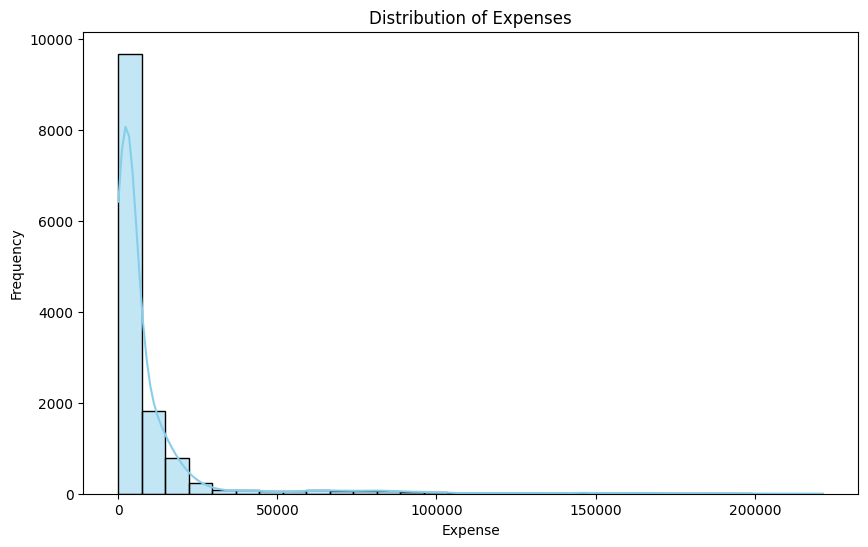

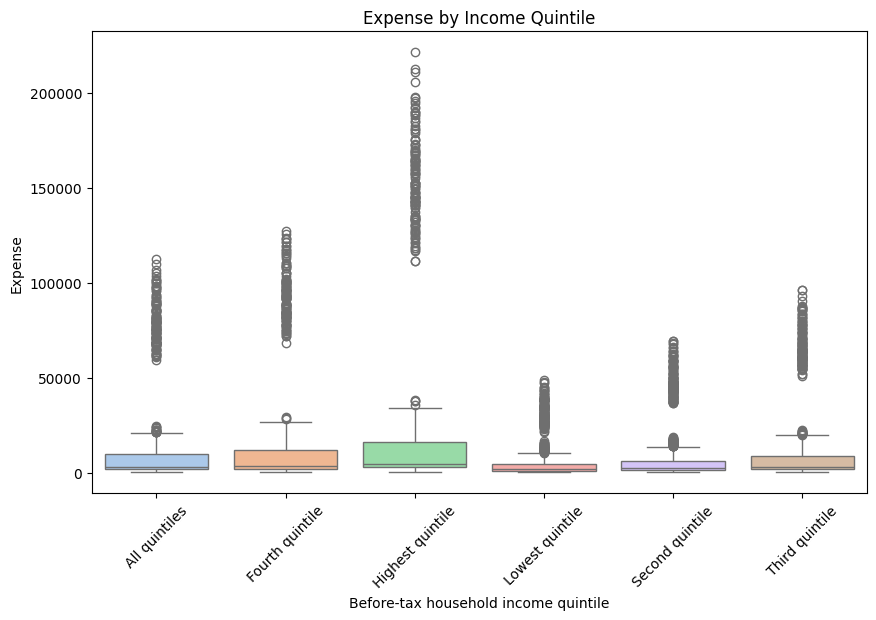

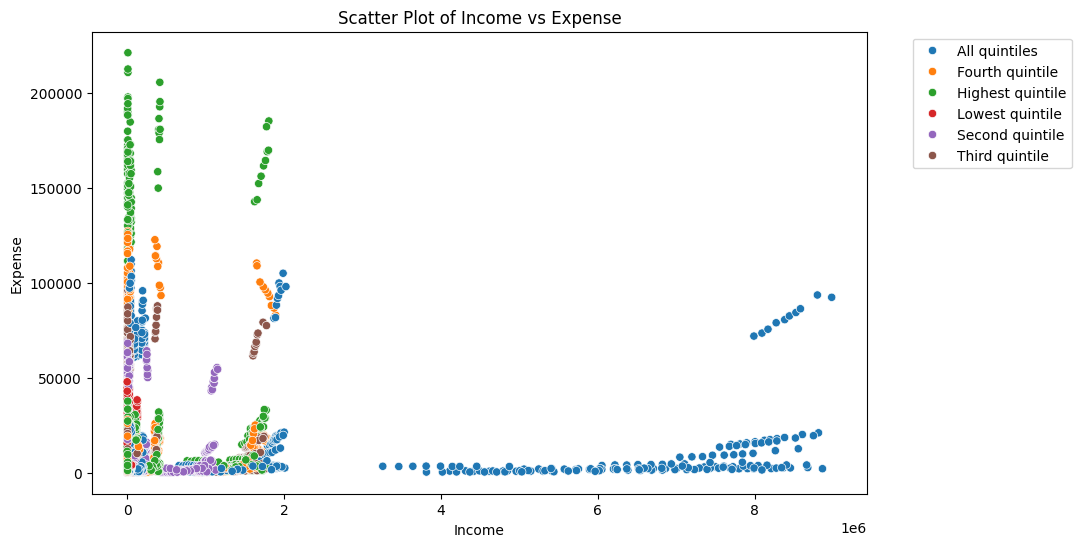


Correlation between Expense and Income: 0.04


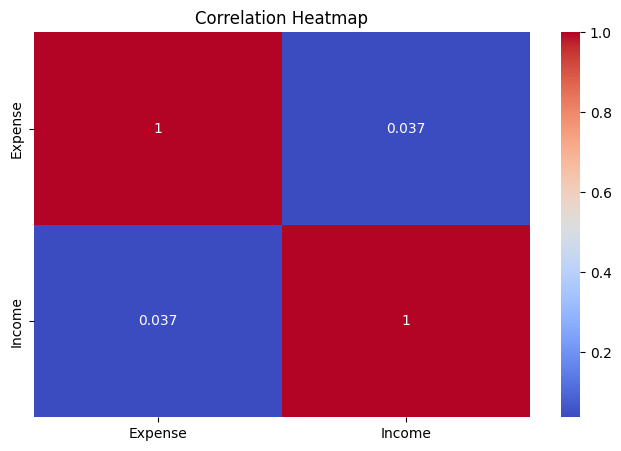


Average Expense and Income by Income Quintile:
                                            Expense         Income
Before-tax household income quintile                             
All quintiles                          9476.128054  627533.841629
Fourth quintile                       11152.780543  146283.579186
Highest quintile                      16726.651357  140972.135747
Lowest quintile                        4753.992534    8435.393665
Second quintile                        6460.022398   83276.276018
Third quintile                         8512.788914  133162.542986

Top 5 Spending Categories:
 Household expenditures, summary-level categories
Total expenditure          79482.398718
Shelter                    15861.238462
Principal accommodation    14343.947436
Transportation             11969.480128
Owned living quarters       8547.028205
Name: Expense, dtype: float64


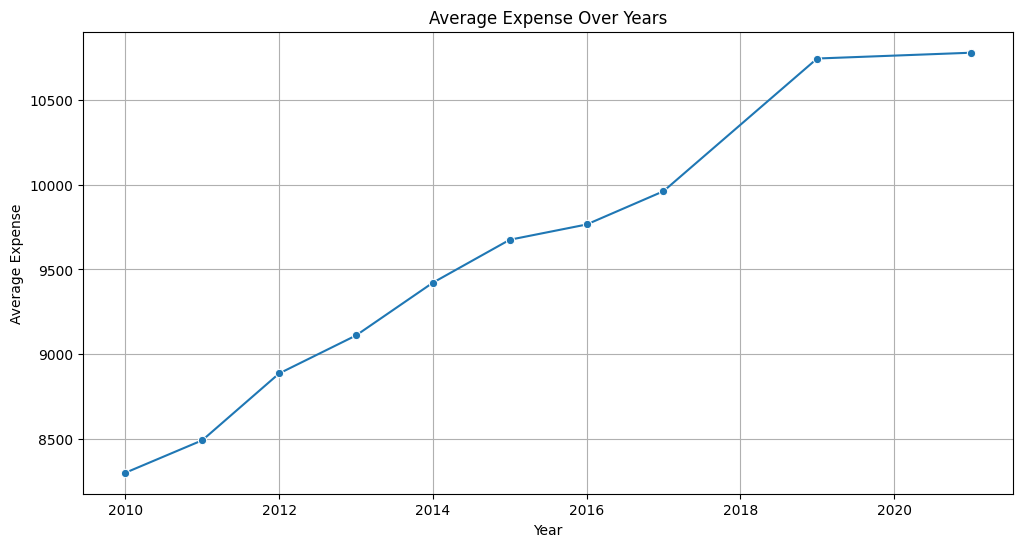

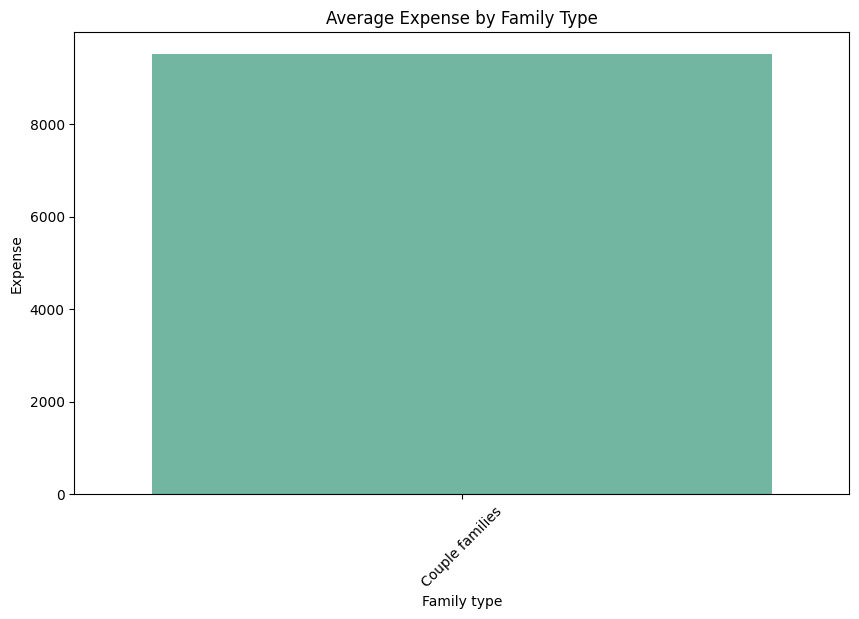

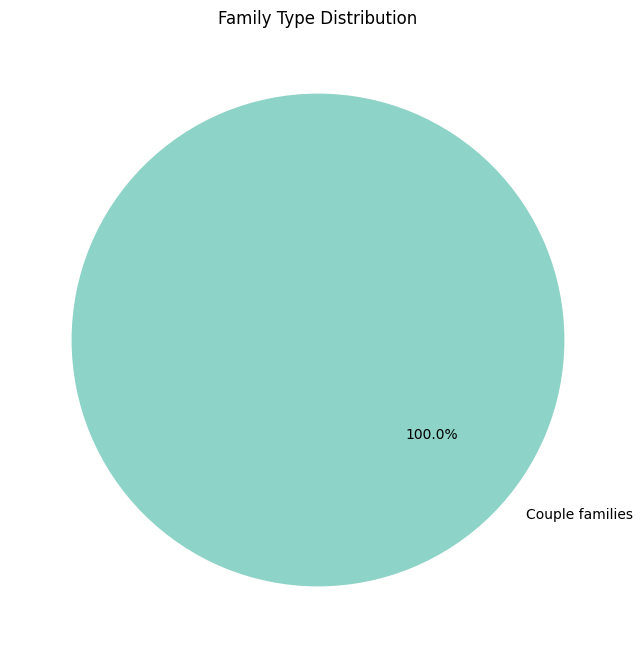

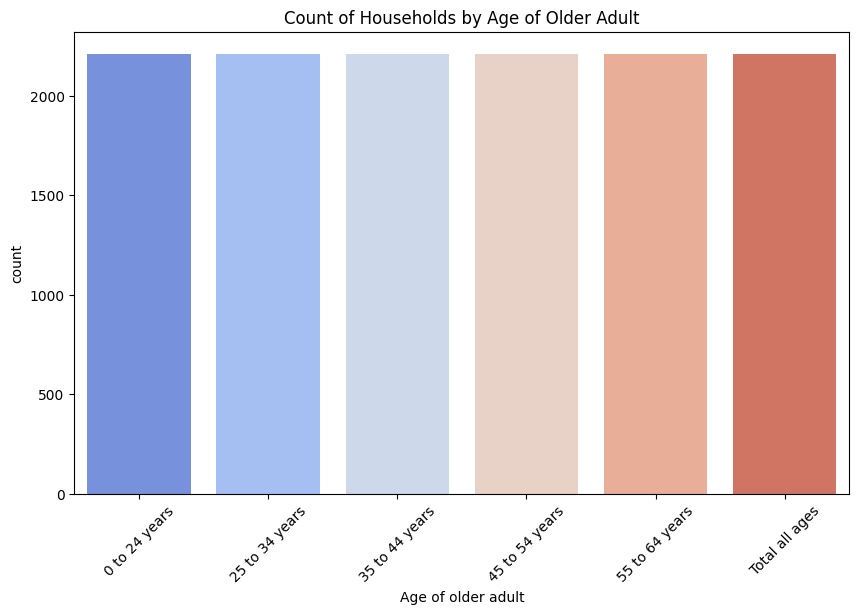

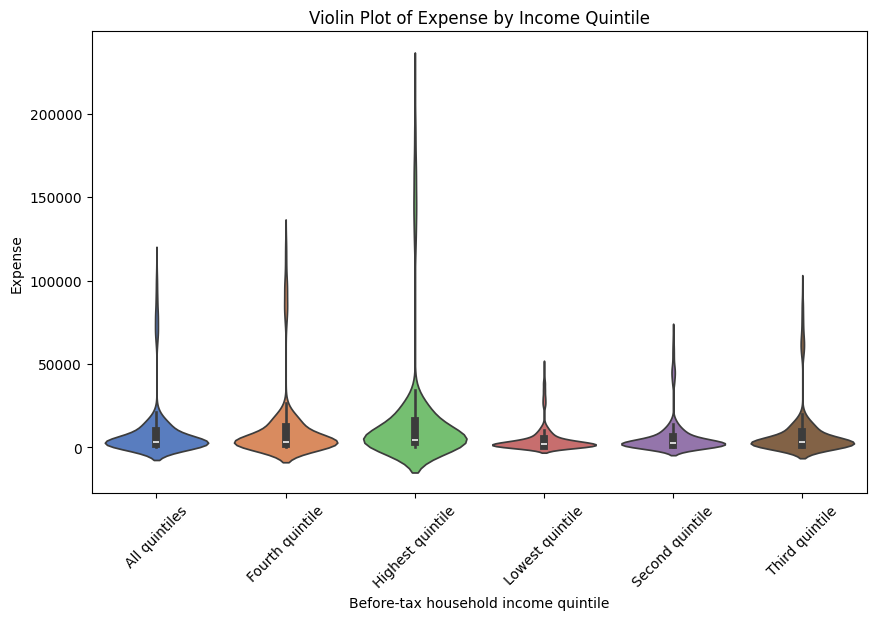


Top Expense Categories in Ontario:

Series([], Name: Expense, dtype: float64)


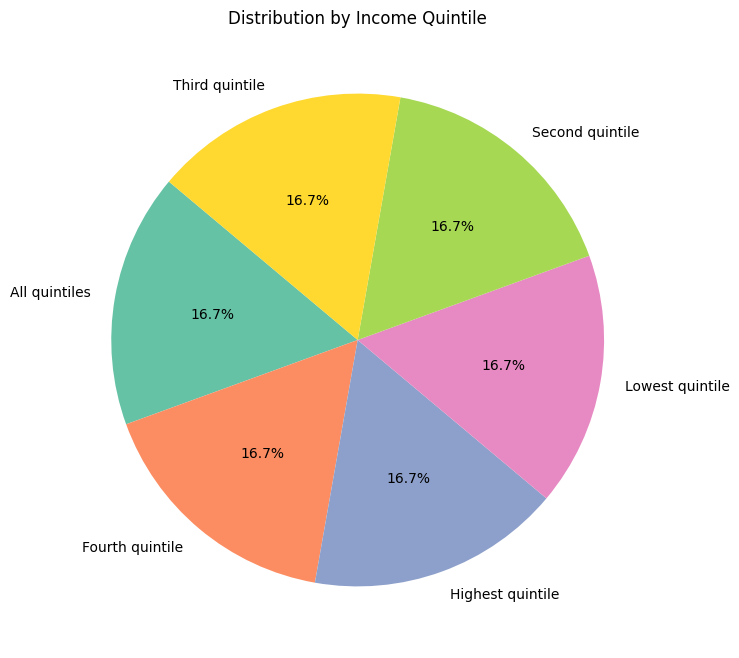

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "C:\\Users\\kamal\\Downloads\\archive (3)\\Income_expense_data.csv"
df = pd.read_csv(file_path)

# Show basic info
print("Dataset Info:\n")
df.info()
print("\nFirst 5 Rows:\n", df.head())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# ✅ Fix chained assignment warning
df['Expense'] = df['Expense'].fillna(df['Expense'].median())
df['Income'] = df['Income'].fillna(df['Income'].median())

# Convert selected columns to category
cat_columns = ['GEO', 'Statistic', 'Before-tax household income quintile',
               'Household expenditures, summary-level categories', 'UOM',
               'Family type', 'Age of older adult', 'Family income']
df[cat_columns] = df[cat_columns].astype('category')

# Summary statistics
print("\nSummary Statistics:\n", df.describe())

# Expense Distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Expense'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Expenses')
plt.xlabel('Expense')
plt.ylabel('Frequency')
plt.show()

# ✅ Assign `hue` to remove seaborn warning
plt.figure(figsize=(10,6))
sns.boxplot(x='Before-tax household income quintile', y='Expense', hue='Before-tax household income quintile', data=df, palette='pastel', legend=False)
plt.title('Expense by Income Quintile')
plt.xticks(rotation=45)
plt.show()

# Income vs Expense Scatter
plt.figure(figsize=(10,6))
sns.scatterplot(x='Income', y='Expense', data=df, hue='Before-tax household income quintile')
plt.title('Scatter Plot of Income vs Expense')
plt.xlabel('Income')
plt.ylabel('Expense')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Correlation
correlation = df['Expense'].corr(df['Income'])
print(f"\nCorrelation between Expense and Income: {correlation:.2f}")

plt.figure(figsize=(8,5))
sns.heatmap(df[['Expense','Income']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# ✅ Avoid future warning by setting `observed=True`
grouped_income = df.groupby('Before-tax household income quintile', observed=True)[['Expense', 'Income']].mean()
print("\nAverage Expense and Income by Income Quintile:\n", grouped_income)

top_expenses = df.groupby('Household expenditures, summary-level categories', observed=True)['Expense'].mean().sort_values(ascending=False).head()
print("\nTop 5 Spending Categories:\n", top_expenses)

# Yearly Expense Trend
plt.figure(figsize=(12,6))
sns.lineplot(data=df.groupby('REF_DATE')['Expense'].mean().reset_index(), x='REF_DATE', y='Expense', marker='o')
plt.title('Average Expense Over Years')
plt.xlabel('Year')
plt.ylabel('Average Expense')
plt.grid(True)
plt.show()

# Family Type Bar Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Family type', y='Expense', hue='Family type', data=df, estimator=np.mean, errorbar=None, palette='Set2', legend=False)
plt.title('Average Expense by Family Type')
plt.xticks(rotation=45)
plt.show()

# Pie Chart - Family Type Distribution
plt.figure(figsize=(8,8))
df['Family type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'))
plt.title('Family Type Distribution')
plt.ylabel('')
plt.show()

# Count Plot - Age of Older Adult
plt.figure(figsize=(10,6))
sns.countplot(x='Age of older adult', data=df, hue='Age of older adult', palette='coolwarm', legend=False)
plt.title('Count of Households by Age of Older Adult')
plt.xticks(rotation=45)
plt.show()

# Violin Plot
plt.figure(figsize=(10,6))
sns.violinplot(x='Before-tax household income quintile', y='Expense', data=df, hue='Before-tax household income quintile', palette='muted', legend=False)
plt.title('Violin Plot of Expense by Income Quintile')
plt.xticks(rotation=45)
plt.show()

# Top categories by province
def top_categories_by_province(province):
    filtered = df[df['GEO'] == province]
    return filtered.groupby('Household expenditures, summary-level categories', observed=True)['Expense'].mean().sort_values(ascending=False).head()

# Example
print("\nTop Expense Categories in Ontario:\n")
print(top_categories_by_province("Ontario"))
# Pie Chart - Income Quintile Distribution
plt.figure(figsize=(8,8))
df['Before-tax household income quintile'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('Set2')
)
plt.title('Distribution by Income Quintile')
plt.ylabel('')
plt.show()


